In [1]:
#library importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
%matplotlib inline

In [2]:
confidence_level = 0.95

In [3]:
stock = ["PG"]

In [4]:
# function for collecting the data
def datacollecter(*tickers):
    main_data = pd.DataFrame()
    assets = [*tickers]
    for a in assets:
        main_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2015-1-1')['Adj Close']
    return main_data

In [5]:
asset = datacollecter(stock)
asset.head()

,PG
Date,
2015-01-02,74.454414
2015-01-05,74.100410
2015-01-06,73.762878
2015-01-07,74.149811
2015-01-08,74.997749


<AxesSubplot:xlabel='Date'>

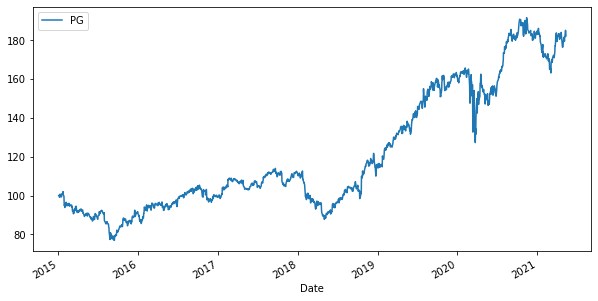

In [6]:
(asset / asset.iloc[0] * 100).plot(figsize=(10, 5))

In [7]:
log_return=np.log(asset / asset.shift(1))
log_return.head()

,PG
Date,
2015-01-02,NaN
2015-01-05,-0.004766
2015-01-06,-0.004565
2015-01-07,0.005232
2015-01-08,0.011371


In [8]:
ascending_list = log_return.sort_values(by=stock , axis = 0 , ascending = True)
ascending_list.head()

,PG
Date,
2020-03-12,-0.091428
2020-03-20,-0.078818
2020-03-11,-0.077233
2020-03-19,-0.058015
2020-02-27,-0.057021


In [9]:
ascending_list.reset_index(drop=True, inplace=True)
ascending_list.head()

,PG
0,-0.091428
1,-0.078818
2,-0.077233
3,-0.058015
4,-0.057021


In [10]:
num_of_days = len(ascending_list.axes[0])-1
num_of_days

1600

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

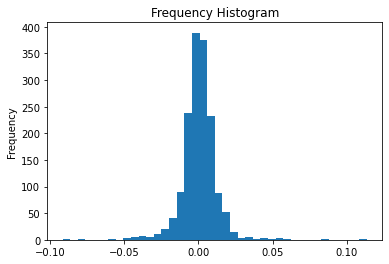

In [11]:
plt.hist(ascending_list, bins=40)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

## VALUE AT RISK(VAR) MODEL

In [12]:
var_limit = 0.95
var_index = int(round((1-var_limit)*num_of_days,0))
var_index
ascending_list.iloc[var_index]

PG   -0.016239
Name: 80, dtype: float64

In [13]:
def var_model(var_limit):
    var_index = int(round((1-var_limit)*num_of_days,0))
    return ascending_list.iloc[var_index]

In [14]:
var_model(confidence_level)

PG   -0.016239
Name: 80, dtype: float64

## CONDITIONAL VALUE AT RISK(CVAR) MODEL

In [15]:
def cvar_model(cvar_limit):
    cvar_index = int(round((1-cvar_limit)*num_of_days,0))
    sum_of_returns = ascending_list[:cvar_index].sum()
    final_cvar = (1/cvar_index)*sum_of_returns
    return final_cvar

In [16]:
cvar_model(confidence_level)

PG   -0.029239
dtype: float64

In [19]:
print("RESULTS:")
print(" "*10)
print(" "*10)
print("With the ",confidence_level, " confidence level, the Value at Risk is ",var_model(confidence_level))
print(" -"*10)
print("With the ",confidence_level, " confidence level, the Conditional Value at Risk is ",cvar_model(confidence_level))
print(" -"*10)

RESULTS:
          
          
With the  0.95  confidence level, the Value at Risk is  PG   -0.016239
Name: 80, dtype: float64
 - - - - - - - - - -
With the  0.95  confidence level, the Conditional Value at Risk is  PG   -0.029239
dtype: float64
 - - - - - - - - - -
